<a href="https://colab.research.google.com/github/Captaingreenbeard/SEM7_Minor_ML_submissionRepo/blob/main/Minor_ML_lab4_NB_and_LDA_Version2_FINAL_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import losses, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from tensorflow.keras.layers import (Convolution2D, Dense, Dropout, GlobalAveragePooling2D, 
                              GlobalMaxPool2D, Input, MaxPool2D, concatenate, Activation,  
                              MaxPooling2D,Flatten,BatchNormalization, Conv2D,AveragePooling2D)
from tensorflow.keras.utils import Sequence, to_categorical
from sklearn.datasets import load_iris 
from sklearn.datasets import make_moons 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import utils
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#need to mount Gdrive
data = pd.read_csv('/content/drive/MyDrive/DALab6_emailsDataset.csv')

In [4]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
is_null = pd.isnull(data).sum()
print('The number of empty values by column:')
print(is_null)

The number of empty values by column:
text    0
spam    0
dtype: int64


clean dataset; can go onto the second step of preparing the corpus

In [6]:
data.shape

(5728, 2)

In [7]:
data.nunique()

text    5695
spam       2
dtype: int64

In [8]:
data['spam'].value_counts(dropna=False)

0    4360
1    1368
Name: spam, dtype: int64

In [9]:
len(data['text'].max())

1032

# Preparing the Corpus

In [10]:
#2 convert the text to lowercase
data['text'] = data['text'].str.lower()

In [11]:
data.head()

,text,spam
0,subject: naturally irresistible your corporate...,1
1,subject: the stock trading gunslinger fanny i...,1
2,subject: unbelievable new homes made easy im ...,1
3,subject: 4 color printing special request add...,1
4,"subject: do not have money , get software cds ...",1


In [12]:
#3 removing all punctuation from dataset
data["text"] = data['text'].str.replace('[^\w\s]','')

<ipython-input-12-2214096eaf2f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["text"] = data['text'].str.replace('[^\w\s]','')


In [13]:
data.head()

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is...,1
2,subject unbelievable new homes made easy im w...,1
3,subject 4 color printing special request addi...,1
4,subject do not have money get software cds fr...,1


In [14]:
##Let us remove the 'subject' from each of the texts; its absoloutely useless              
data['text'] = data["text"].str.replace("subject","")

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [17]:
def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

In [18]:
#4 removing all English stopwords from the dataset
data['text'] = data['text'].apply(remove_stopwords)

In [19]:
data.head()

,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new homes made easy im wanting sh...,1
3,4 color printing special request additional in...,1
4,money get software cds software compatibility ...,1


In [20]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [21]:
def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

In [22]:
#5 stem the words in the dataset
data['text'] = data['text'].apply(perform_stemming)

In [23]:
data.head()

,text,spam
0,natur irresist corpor ident lt realli hard rec...,1
1,stock trade gunsling fanni merril muzo colza a...,1
2,unbeliev new home made easi im want show homeo...,1
3,4 color print special request addit inform cli...,1
4,money get softwar cd softwar compat great grow...,1


# adding additional features to the corpus to increase accuracy

In [24]:
data['Total Words'] = data['text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

def count_chars(text):
    
    return len(text)


data['Total Chars']= data['text'].apply(count_chars)

In [25]:
data.head()

,text,spam,Total Words,Total Chars
0,natur irresist corpor ident lt realli hard rec...,1,217,972
1,stock trade gunsling fanni merril muzo colza a...,1,63,452
2,unbeliev new home made easi im want show homeo...,1,44,246
3,4 color print special request addit inform cli...,1,54,324
4,money get softwar cd softwar compat great grow...,1,18,106


# Building machine learning models

In [26]:
data.columns

Index(['text', 'spam', 'Total Words', 'Total Chars'], dtype='object')

In [27]:
data.head()

,text,spam,Total Words,Total Chars
0,natur irresist corpor ident lt realli hard rec...,1,217,972
1,stock trade gunsling fanni merril muzo colza a...,1,63,452
2,unbeliev new home made easi im want show homeo...,1,44,246
3,4 color print special request addit inform cli...,1,54,324
4,money get softwar cd softwar compat great grow...,1,18,106


In [28]:
corpus = data['text']

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus.values).toarray()
y = data.iloc[:, 1].values

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split( 
          X, y, test_size = 0.2, random_state = 100)

# Naive Baye's

In [31]:
clf_NB = GaussianNB()
clf_NB = clf_NB.fit(X_train, y_train)
y_pred = clf_NB.predict(X_test)
NB_score1 = clf_NB.score(X_test, y_test)
print('NB_score ',NB_score1)
confusion_matrix(y_test, y_pred)

NB_score  0.9554973821989529


array([[830,  15],
       [ 36, 265]])

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy score:  0.9554973821989529
Precision score:  0.9464285714285714
Recall score:  0.8803986710963455
F1 score:  0.9122203098106713


In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_lda1=model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print('Accuracy score: ', accuracy_score(y_test, y_lda1))
print('Precision score: ', precision_score(y_test, y_lda1))
print('Recall score: ', recall_score(y_test, y_lda1))
print("F1 score: ",f1_score(y_test, y_lda1))

Accuracy score:  0.6614310645724258
Precision score:  0.40045766590389015
Recall score:  0.5813953488372093
F1 score:  0.47425474254742545


In [44]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
tn3, fp3, fn3, tp3 = confusion_matrix(y_test,y_lda1).ravel()

In [45]:
def Specificity(tn0,fp0,fn0,tp0):
  spec= tn0 / (tn0+fp0)
  return spec

def Sensitivity(tn0,fp0,fn1,tp0):
  sen=tp0/(tp0+fn1)
  return sen

def error(y_test0,pred):
   err= 1-accuracy_score(y_test0,pred)
   return err

In [46]:
print('For Naive Bayes: ')
print('Specificity is: ', Specificity(tn, fp, fn, tp))
print('Sensitivity is: ', Sensitivity(tn, fp, fn, tp))
print('Error is: ', error(y_test, y_pred))

For Naive Bayes: 
Specificity is:  0.9822485207100592
Sensitivity is:  0.8803986710963455
Error is:  0.04450261780104714


In [47]:
print('For LDA: ')
print('Specificity is: ', Specificity(tn3, fp3, fn3, tp3))
print('Sensitivity is: ', Sensitivity(tn3, fp3, fn3, tp3))
print('Error is: ', error(y_test, y_pred))

For LDA: 
Specificity is:  0.6899408284023668
Sensitivity is:  0.5813953488372093
Error is:  0.04450261780104714


# Confusion Matrix visualization

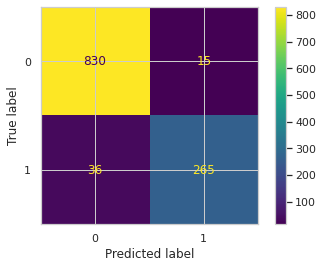

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf_NB, X_test, y_test)

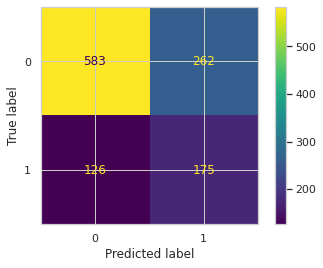

In [38]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

Based on the above analysis we can infer the following:

    The sparsity of a lower dimension data is lower thus having lesser zero valued elements compared to a higher dimension matrix.
    The models show a higher accuracy on lower dimension space as compared to a higher dimension space, as exprimented
    The specificty and accuracy of the GausseanNB model was the best both in the lower and higher dimentions.
    Hence GausseanNB can be considered as the best model for predicting the spam-ham classification problem 

